In [1]:
import pandas as pd
import json
import string
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Antonio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
pd.set_option('mode.chained_assignment', None)

In [6]:
noticias = pd.read_csv("../../../dados/bbc-text.csv")

In [18]:
noticias

,category,text,text_no_enter,text_no_contractions
0,tech,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say ...,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...,ocean s twelve raids box office ocean s twelve...
...,...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,cars pull down us retail figures us retail sal...,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...,kilroy unveils immigration policy ex-chatshow ...,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...,rem announce new glasgow concert us band rem h...,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...,how political squabbles snowball it s become c...,how political squabbles snowball it s become c...


## Verificar quantidade de filmes por categoria

In [8]:
generos_agrupados = noticias.groupby("category").count().sort_values(ascending=True, by="category")

In [10]:
generos_agrupados

,text
category,
business,510
entertainment,386
politics,417
sport,511
tech,401


<Axes: ylabel='category'>

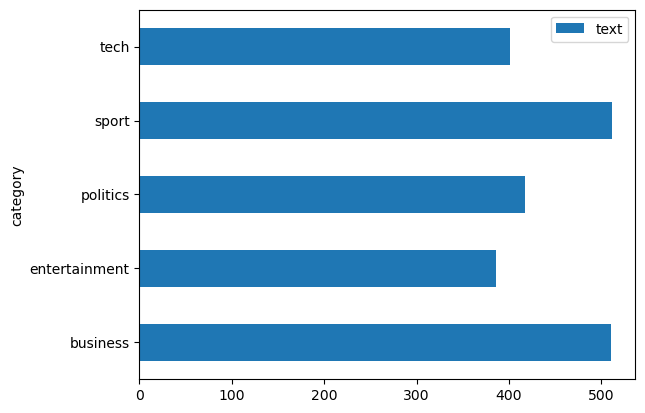

In [12]:
generos_agrupados.plot.barh(y="text")

## Remover os caracteres \n \r \t

In [13]:
trans = str.maketrans('\n\r\t', '   ')
noticias["text_no_enter"] = noticias["text"].str.translate(trans)

## Remover contrações em Inglês

In [15]:
contraction_dict = {
                    "aren't": "are not",		"can't": "can not",		"could've": "could have",
                    "couldn't": "could not",	"daren't": "dare not",	"didn't": "did not",
                    "doesn't": "does not",		"don't": "do not",		"hadn't": "had not",
                    "hasn't": "has not",		"haven't": "have not",	"he's": "he is",
                    "how'd": "how had",			"how're": "how are",	"how's": "how is",
                    "how've": "how have",		"i'd": "i had",			"i'm": "i am",
                    "i've": "i have",			"isn't": "is+ not",		"it's": "it is",
                    "might've": "might have",	"mightn't": "might not",	"must've": "must have",
                    "mustn't": "must not",		"needn't": "need not",	"oughtn't": "ought not",
                    "shan't": "shall not",		"she'd": "she had",		"she's": "she is",
                    "should've": "should have",	"shouldn't": "should not",	"that'd": "that had",
                    "thats's": "that is",		"there'd": "there had",	"there's": "there is",
                    "they'd": "they had",		"they're": "you are",	"they've": "they have",
                    "wasn't": "was+ not",		"we'd": "we had",		"we're": "we are",
                    "we've": "we have",			"weren't": "were not",	"what'd": "what had",
                    "what're": "what are",		"what's": "what is",	"what've": "what have",
                    "when'd": "when had",		"when're": "when are",	"when's": "when is",
                    "when've": "when have",		"where'd": "where had",	"where're": "where are",
                    "where's": "where is",		"where've": "where have",	"who'd": "who had",
                    "who're": "who are",		"who's": "who is",		"who've": "who have",
                    "why'd": "why had",			"why're": "why are",	"why's": "why is",
                    "why've": "why have",		"would've": "would have",	"wouldn't": "would not",
                    "you're": "you are",		"you've": "you have",	"'cause": "because", 
                    "ain't": "is not", 			"aren't": "are not",	"can't": "cannot", 
                    "could've": "could have",	"he's": "he is",		"how'll": "how will",
                    "i'll": "i will",			"it'll": "it will",		"it's": "it is", 
                    "she'll": "she will",		"she's": "she is",		"that'll": "that will",
                    "there'll": "there will",	"they'll": "they will",	"they're": "they are",
                    "we'll": "we will",			"we're": "we are",		"what'll": "what will",
                    "when'll": "when will",		"where'll": "where will",	"who'll": "who will",
                    "yo're": "you are",			"you'll": "you will"
            }

In [16]:
def remove_contractions( text ):
    global contraction_dict
    if isinstance(text, str):
        text = text.lower()
        for contracao_chave in contraction_dict.keys():
            contracao_valor = contraction_dict[contracao_chave]
            text = text.replace(contracao_chave, contracao_valor)
        text = text.replace("\'s", " have")
        return text
    else:
        return ""

In [17]:
noticias["text_no_contractions"] = noticias["text_no_enter"].apply(remove_contractions)

## Remover as pontuações

In [19]:
trans = str.maketrans('', '', string.punctuation)
noticias["text_no_punctuation"] = noticias["text_no_contractions"].str.translate(trans)

## Remover as stopwords

In [20]:
stopwords = nltk.corpus.stopwords.words('english')

In [21]:
def remove_stop_words( text ):
    novas_palavras = []
    palavras = text.split(" ")
    for palavra in palavras:
        if palavra not in stopwords:
            novas_palavras.append(palavra)
    return " ".join(novas_palavras)

In [22]:
noticias["text_no_stopwords"] = noticias["text_no_punctuation"].apply(remove_stop_words)

## Definindo variavel textos

In [23]:
textos = noticias["text_no_stopwords"]

## Criar o Bag of words

In [24]:
vetorizador = CountVectorizer(max_features=1000)
bow = vetorizador.fit_transform( textos )
vocabulario = vetorizador.get_feature_names_out()

In [28]:
print(bow.shape)
bow.toarray()

(2225, 1000)


array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
bow_matrix = pd.DataFrame.sparse.from_spmatrix(bow, columns=vocabulario)

In [30]:
bow_matrix

,000,10,100,11,12,13,14,15,16,17,...,worth,would,wrong,year,years,yet,york,young,yukos,zealand
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2221,2,0,0,0,0,0,1,0,0,0,...,0,1,0,2,0,0,0,0,0,0
2222,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2223,1,0,0,0,0,0,0,0,0,0,...,1,2,1,0,0,0,0,0,0,0


## Separar os conjuntos em treinamento e testes

In [31]:
train_x, test_x, train_y, test_y = train_test_split(bow_matrix, noticias["category"], random_state=50, test_size=0.25)

In [32]:
print("train_x: ", train_x.shape)
print("test_x: ", test_x.shape)
print("train_y: ", train_y.shape)
print("test_y: ", test_y.shape)

train_x:  (1668, 1000)
test_x:  (557, 1000)
train_y:  (1668,)
test_y:  (557,)


## Criar modelo aprendizagem de maquina

In [39]:
# model = SVC(C=1.0, kernel='linear', degree=3, gamma='auto', random_state=50)
# mode = SVC(decision_function_shape='ovr')
#model = LogisticRegression()
model = LinearSVC(random_state = 50)

In [40]:
model.fit(train_x, train_y)

C:\Users\Antonio\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Antonio\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=50)

In [41]:
model.score(test_x, test_y)

0.9605026929982047

In [53]:
frase = "explosions on israel affect many citizens"

In [54]:
vetorizador2 = CountVectorizer(max_features=1000, vocabulary=vocabulario)
novo_bow = vetorizador2.fit_transform( [frase] )

In [55]:
novo_bow.shape

(1, 1000)

In [56]:
model.predict(novo_bow)

array(['sport'], dtype=object)